<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
# Загрузка обучающей выборки (train). Пожалуйста, используйте свой путь для загрузки данных.
# data = pd.read_csv('./train.csv') # Если загружать на локальном компьютере данные из той же папки.

data = pd.read_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/train.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
# Посмотрим на случайные строчки
data.sample(frac=1).head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
486,3,75.15,216.75,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),1
4324,36,94.80,3565.65,Female,0,No,No,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),0
2775,70,115.15,8250,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
4018,49,56.30,2780.6,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),0
290,71,100.45,7159.7,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,Yes,Two year,No,Electronic check,0
3138,46,95.25,4424.2,Female,1,No,No,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,Credit card (automatic),1
2899,32,91.05,2954.5,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),1
3480,16,75.10,1212.85,Female,0,No,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,No,Bank transfer (automatic),0
2890,53,60.45,3184.25,Male,0,Yes,No,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,1
3072,10,85.55,851.75,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,1


In [ ]:
# Посмотрим, сводную информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Похоже, что пропущенных значений нет. Проверим еще по-другому

In [ ]:
data.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Проверим данные на наличие дубликатов и если есть, удалим

In [ ]:
data.duplicated().sum()

14

In [ ]:
data = data.drop_duplicates().reset_index(drop = True)
data.shape

(5268, 20)

Еще посмотрим на уникальные значения в каждом столбце c категориальными признаками.

In [ ]:
for col in cat_cols:
    print(f'{data[col].unique().size} уникальных значения','  Тип данных', data[col].dtype, \
          col, data[col].unique())

2 уникальных значения   Тип данных object Sex ['Male' 'Female']
2 уникальных значения   Тип данных int64 IsSeniorCitizen [0 1]
2 уникальных значения   Тип данных object HasPartner ['Yes' 'No']
2 уникальных значения   Тип данных object HasChild ['Yes' 'No']
2 уникальных значения   Тип данных object HasPhoneService ['Yes' 'No']
3 уникальных значения   Тип данных object HasMultiplePhoneNumbers ['No' 'Yes' 'No phone service']
3 уникальных значения   Тип данных object HasInternetService ['No' 'Fiber optic' 'DSL']
3 уникальных значения   Тип данных object HasOnlineSecurityService ['No internet service' 'No' 'Yes']
3 уникальных значения   Тип данных object HasOnlineBackup ['No internet service' 'No' 'Yes']
3 уникальных значения   Тип данных object HasDeviceProtection ['No internet service' 'No' 'Yes']
3 уникальных значения   Тип данных object HasTechSupportAccess ['No internet service' 'Yes' 'No']
3 уникальных значения   Тип данных object HasOnlineTV ['No internet service' 'No' 'Yes']
3 уника

Мы видим, что у колонки IsSeniorCitizen числовой тип данных (но это категориальный признак). Поскольку дальше мы будем применять onehotencoding, заменим $1$ на $Yes$, а $0$ на $No$

In [ ]:
data.IsSeniorCitizen.replace([1, 0], ['Yes', 'No'], inplace = True)
data.IsSeniorCitizen.sample(frac=1).head(8)

4782    No
2618    No
2301    No
1273    No
232     No
3166    No
3839    No
4815    No
Name: IsSeniorCitizen, dtype: object

Посмотрим, как обстоят дела с числовыми данными.

In [ ]:
for col in num_cols:
    print(f'{data[col].unique().size} уникальных значения',\
          '  Тип данных', data[col].dtype, col)

73 уникальных значения   Тип данных int64 ClientPeriod
1468 уникальных значения   Тип данных float64 MonthlySpending
4978 уникальных значения   Тип данных object TotalSpent


Колонка TotalSpent имеет строковый тип данных, а нужно привести его к числовому.

In [ ]:
data.TotalSpent.head(10)

0    1026.35
1     1872.2
2       75.9
3       2570
4    6758.45
5      475.2
6     2423.4
7       45.7
8     5341.8
9    4390.25
Name: TotalSpent, dtype: object

In [ ]:
TotalSpent_tonum = pd.to_numeric(data.TotalSpent, errors='coerce')
TotalSpent_tonum.isna().sum()

9

Значит все таки есть пропущенные значения. Только они представляют из себя пустые строки.

In [ ]:
TotalSpent_tonum.describe()

count    5259.000000
mean     2297.370441
std      2269.066122
min        18.800000
25%       403.775000
50%      1415.000000
75%      3816.625000
max      8684.800000
Name: TotalSpent, dtype: float64

Довольно широкий диапазон значений. Заменим все пропуски на нули.

In [ ]:
TotalSpent_tonum[TotalSpent_tonum.isna()] = 0
data.TotalSpent = TotalSpent_tonum
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5268 non-null   int64  
 1   MonthlySpending           5268 non-null   float64
 2   TotalSpent                5268 non-null   float64
 3   Sex                       5268 non-null   object 
 4   IsSeniorCitizen           5268 non-null   object 
 5   HasPartner                5268 non-null   object 
 6   HasChild                  5268 non-null   object 
 7   HasPhoneService           5268 non-null   object 
 8   HasMultiplePhoneNumbers   5268 non-null   object 
 9   HasInternetService        5268 non-null   object 
 10  HasOnlineSecurityService  5268 non-null   object 
 11  HasOnlineBackup           5268 non-null   object 
 12  HasDeviceProtection       5268 non-null   object 
 13  HasTechSupportAccess      5268 non-null   object 
 14  HasOnlin

Теперь тип данных в колонках указан верно.

Проверим, нет ли в других колонках пропущенных значений.

In [ ]:
for col in cat_cols:
    print('Количество пустых значений', data[col].str.isspace().sum(), '  |  ', col)

Количество пустых значений 0   |   Sex
Количество пустых значений 0   |   IsSeniorCitizen
Количество пустых значений 0   |   HasPartner
Количество пустых значений 0   |   HasChild
Количество пустых значений 0   |   HasPhoneService
Количество пустых значений 0   |   HasMultiplePhoneNumbers
Количество пустых значений 0   |   HasInternetService
Количество пустых значений 0   |   HasOnlineSecurityService
Количество пустых значений 0   |   HasOnlineBackup
Количество пустых значений 0   |   HasDeviceProtection
Количество пустых значений 0   |   HasTechSupportAccess
Количество пустых значений 0   |   HasOnlineTV
Количество пустых значений 0   |   HasMovieSubscription
Количество пустых значений 0   |   HasContractPhone
Количество пустых значений 0   |   IsBillingPaperless
Количество пустых значений 0   |   PaymentMethod


__Сделаем тоже самое для тестовых данных__

In [ ]:
# Пожалуйста, используйте свой путь для загрузки данных.
# test_data = pd.read_csv('./test.csv') # Если загружать на локальном компьютере данные из той же папки. 

test_data = pd.read_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/test.csv')
test_data.shape

(1761, 19)

In [ ]:
# Меняем 1 и 0 'Yes', 'No'
test_data.IsSeniorCitizen.replace([1, 0], ['Yes', 'No'], inplace = True)

In [ ]:
# Преобразовываем колонку TotalSpent к численному признаку (каким он и является)
TotalSpent_tonum = pd.to_numeric(test_data.TotalSpent, errors='coerce')
TotalSpent_tonum[TotalSpent_tonum.isna()] = 0
test_data.TotalSpent = TotalSpent_tonum

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   float64
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   object 
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [ ]:
for col in cat_cols:
    print('Количество пустых значений', test_data[col].str.isspace().sum(), '  |  ', col)

Количество пустых значений 0   |   Sex
Количество пустых значений 0   |   IsSeniorCitizen
Количество пустых значений 0   |   HasPartner
Количество пустых значений 0   |   HasChild
Количество пустых значений 0   |   HasPhoneService
Количество пустых значений 0   |   HasMultiplePhoneNumbers
Количество пустых значений 0   |   HasInternetService
Количество пустых значений 0   |   HasOnlineSecurityService
Количество пустых значений 0   |   HasOnlineBackup
Количество пустых значений 0   |   HasDeviceProtection
Количество пустых значений 0   |   HasTechSupportAccess
Количество пустых значений 0   |   HasOnlineTV
Количество пустых значений 0   |   HasMovieSubscription
Количество пустых значений 0   |   HasContractPhone
Количество пустых значений 0   |   IsBillingPaperless
Количество пустых значений 0   |   PaymentMethod


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [ ]:
# YOUR CODE

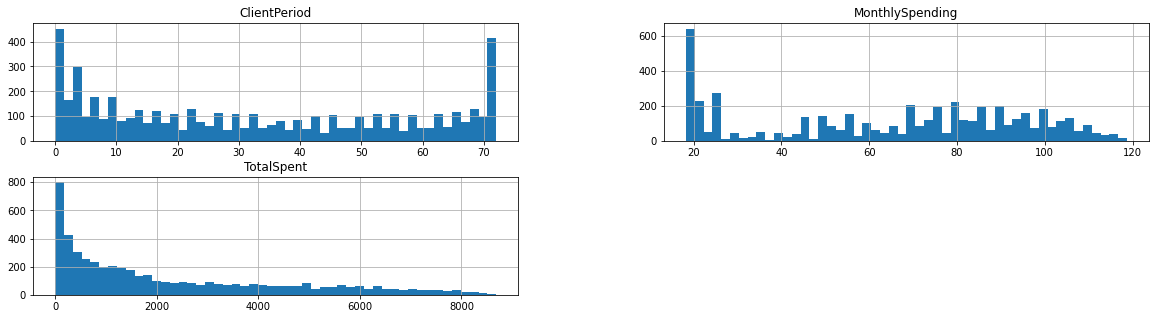

In [ ]:
# Посмотрим на числовые признаки
hist = data[num_cols].hist(figsize = (20, 5), bins=50)

Сразу можно отметить, что масштаб данных различается. И распределения далеки от нормальных.

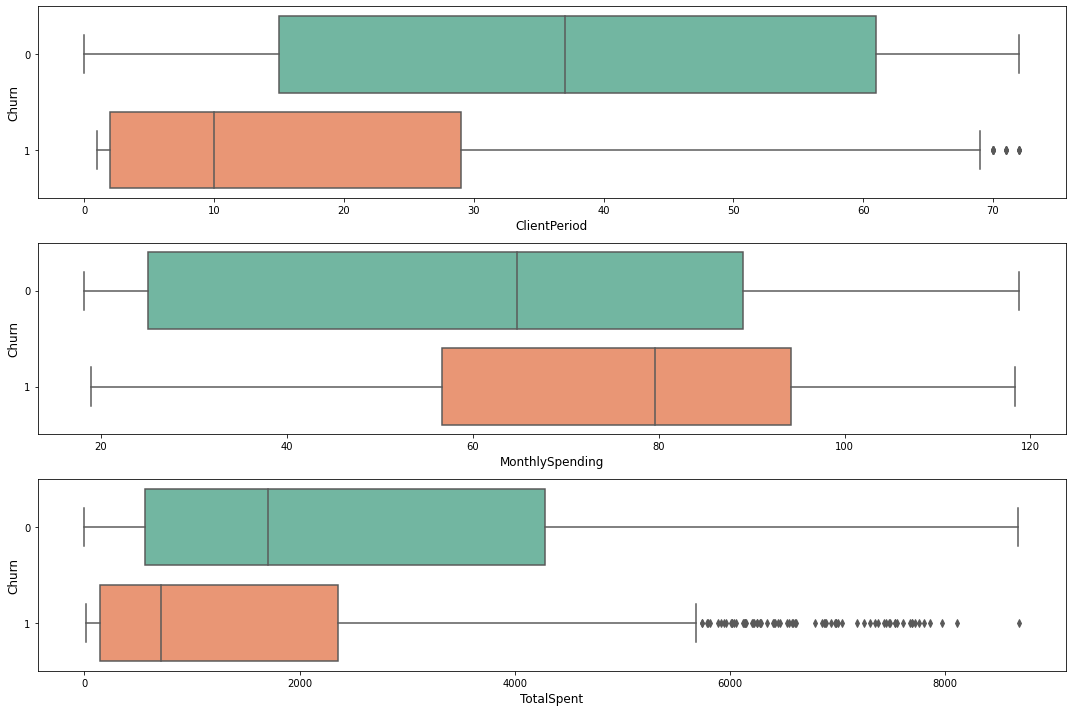

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

for ind, val in enumerate(num_cols):
    plt.subplot(3, 1, ind + 1)
    sns.boxplot(y=target_col, x=val, data=data, palette = 'Set2', orient = 'h')
    ax.set_title(f'Распределение признака {val} в зависимости от целевой переменной', fontsize=16)
    plt.xlabel(val, fontsize=12)
    plt.ylabel(target_col, fontsize=12)

fig.tight_layout()

Здесь можно отметить следующее:
 - Медианы значений ClientPeriod при разных значениях целевой переменной смещены. Это свиделельствует в пользу корреляции.
 - Для TotalSpent xарактерно довольно много выборосов при значении целевой переменной равном 1.

Видно, что для признаков ClientPeriod и TotalSpent характерно наличие выбросов. Посмотрим их количество для ClientPeriod.

In [ ]:
data[data.ClientPeriod >= 70].ClientPeriod.count()

511

Это почти 10% таблицы.

In [ ]:
data[(data.ClientPeriod >= 70) & (data.Churn == 0)][['ClientPeriod', 'Churn']].shape

(493, 2)

Интересно, что почти для всех пользователей с клиентским периодом более 70 (предполагаю, что это месяцы) характерна лояльность (т.е. отток не происходит). Если останется время, я бы попробовала этот признак перевести в категориальный и разбить на периоды и после этого посмотреть на связь с целевой переменной.  

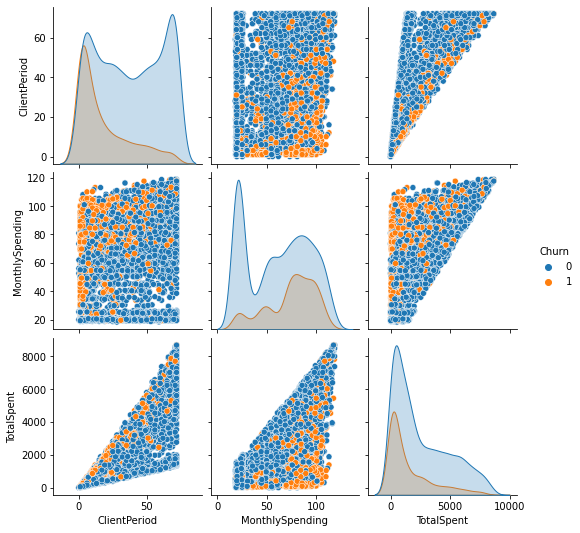

In [ ]:
# Построим pairplot
sns.pairplot(data[num_cols + [target_col]], hue=target_col, diag_kind="auto")

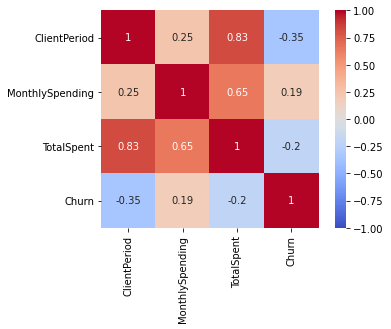

In [ ]:
#Еще посмотрим на heatmap
sns.heatmap(data[num_cols+ [target_col]].corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', square=True)

Признак TotalSpent имеет довольно высокую корреляцию с другими численными признаками.

Попробуем перемножить признаки MonthlySpending и ClientPeriod и снова посмотрим на heatmap

In [ ]:
data_new_feat = data[num_cols]

data_new_feat['per_spent'] = data_new_feat['MonthlySpending'] * data_new_feat['ClientPeriod']
data_new_feat['target'] = data[target_col]
data_new_feat.head()

,ClientPeriod,MonthlySpending,TotalSpent,per_spent,target
0,55,19.50,1026.35,1072.5,0
1,72,25.85,1872.20,1861.2,0
2,1,75.90,75.90,75.9,1
3,32,79.30,2570.00,2537.6,0
4,60,115.25,6758.45,6915.0,0


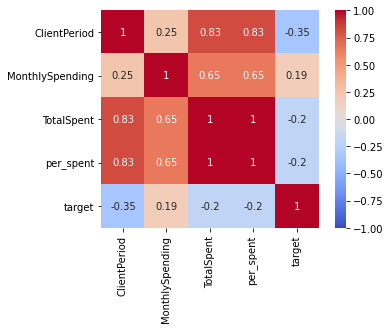

In [ ]:
sns.heatmap(data_new_feat.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', square=True)

Догадка оказалась верна. TotalSpent не равен в точности произведению двух других численных признаков, но имеет полную корреляцию с этим произведением. Т.е. фактически у нас 2 независимых признака, а не 3.

Перейдем к анализу категориальных признаков

In [ ]:
cat_cols

['Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'IsBillingPaperless',
 'PaymentMethod']

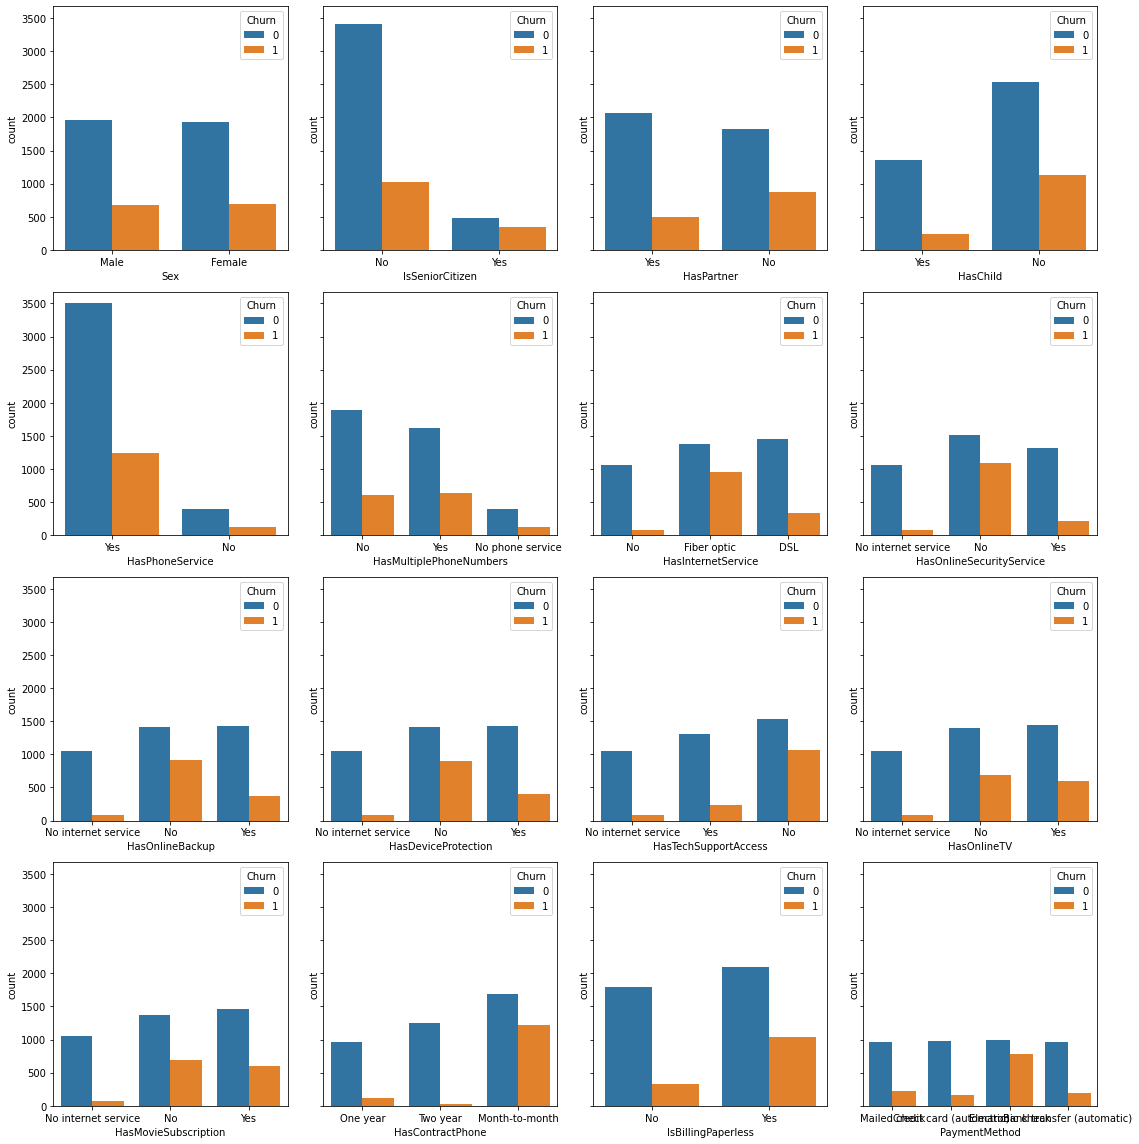

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16), sharey=True)
for i in range(len(cat_cols)):
    sns.countplot(x=cat_cols[i], data=data, hue = target_col, ax=axes[i // 4, i % 4])
fig.tight_layout()

Какие закономерности сразу бросаются в глаза:
 - IsSeniorCitizen и HasPhoneService имеют сильный перевес в сторону значения $No$. 
 - У мужчин и женщин очень похожее распределение значений целевой переменной. Т.е. нельзя сказать, что мужчины или женщины чаще отказываются от сервиса. Стоит попробовать не учитывать этот признак при построении модели.
 - IsSeniorCitizen. Не смотря на то, что данные несбалансированы (гораздо больше значений $No$) можно заметить, что доля $0$ класса целевой переменной выше при значении признака $No$
 - HasInternetService, HasOnlineSecurityService, HasOnlineBackup, HasDeviceProtection, HasTechSupportAccess, HasOnlineBackup, HasContractPhone, PaymentMethod похоже влюяют на отток, т.к. одно из значений признака существенно повышает долю 1 класса целевой переменной.

Еще посмотрим на соотношение значений признака

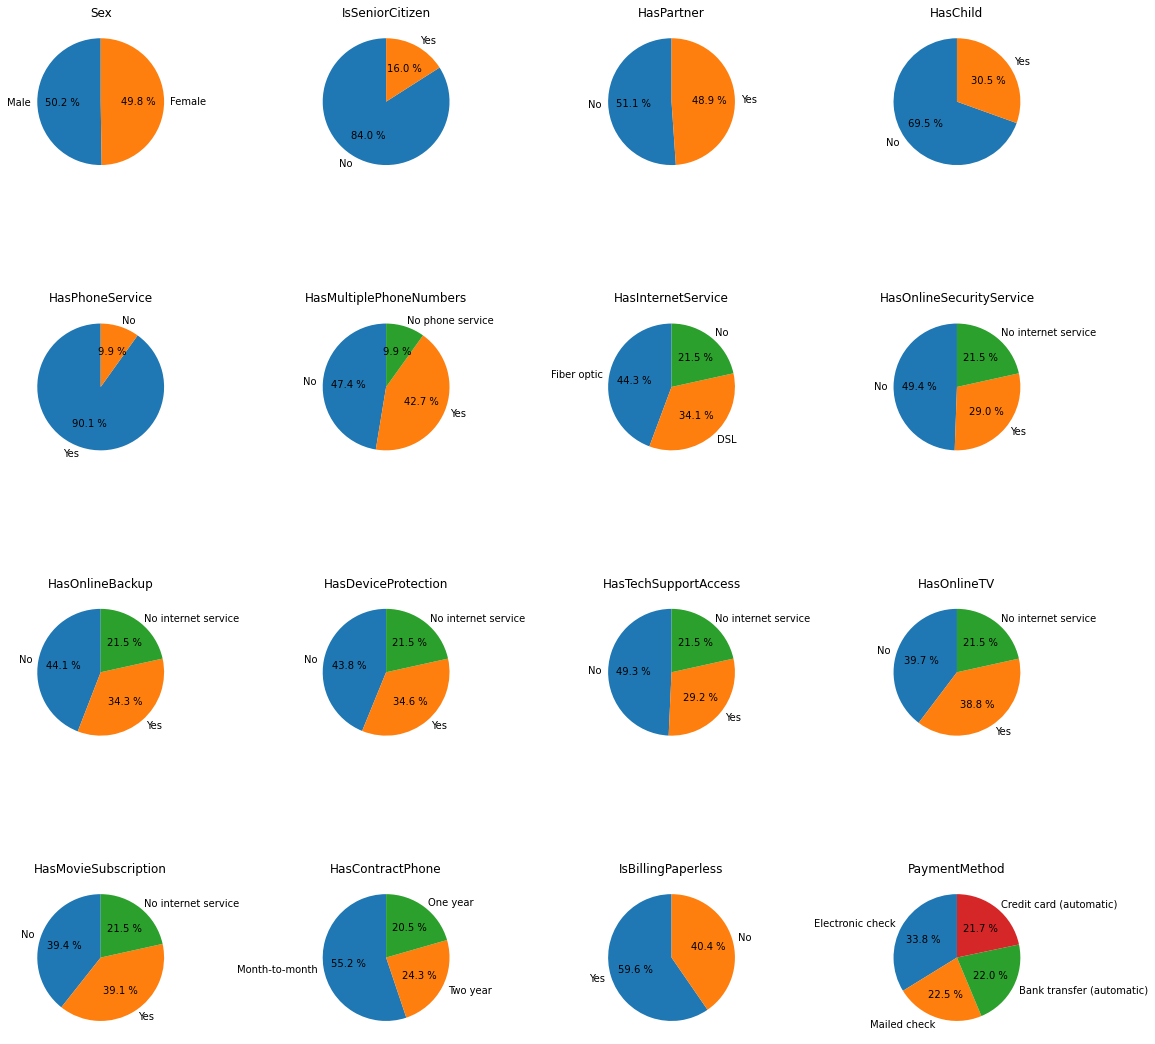

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16), sharey=True)
for ind, val in enumerate(cat_cols):
    plt.subplot(4, 4, ind + 1)
    plt.pie(data[val].value_counts(), labels = data[val].value_counts().index.tolist(),\
        autopct ='%.1f %%', startangle = 90)
    plt.title(val)
    
fig.tight_layout()


Интересно посмотреть на те же графики но только для значений целевой переменной = $1$

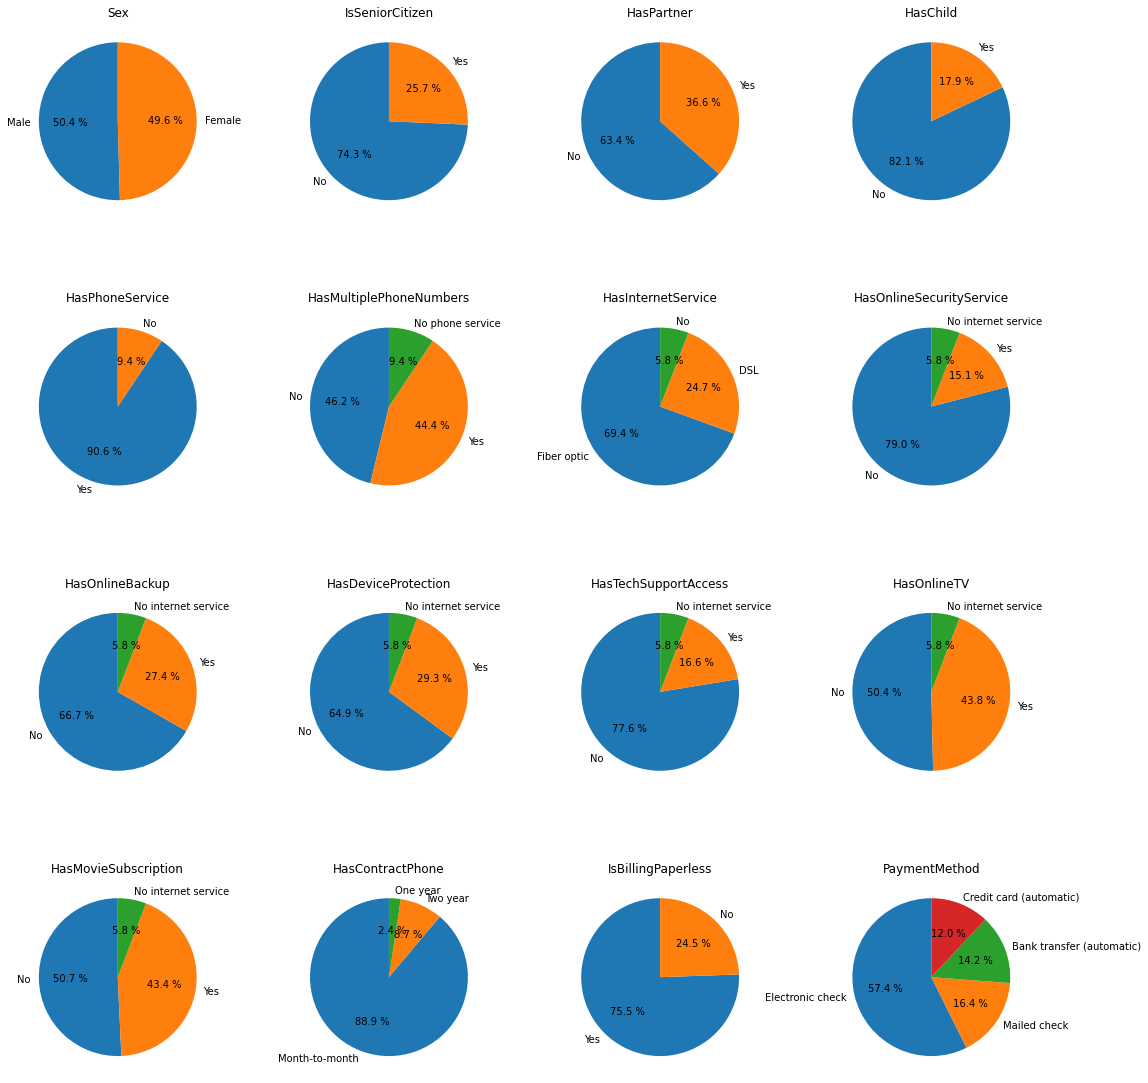

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16), sharey=True)
for ind, val in enumerate(cat_cols):
    plt.subplot(4, 4, ind + 1)
    plt.pie(data[data[target_col] == 1][val].value_counts(), labels = data[val].value_counts().index.tolist(),\
        autopct ='%.1f %%', startangle = 90)
    plt.title(val)
    
fig.tight_layout()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

Похоже, что некоторое одно значение многих признаков (в основном $No$) влияет на отток.

В дальнейшем я не буду при построении моделей использовать признак $Sex$, т.к. очевидно, что он или не влияет или не вносит существенных вклад в значение целевой переменной.

In [ ]:
new_cat_cols = cat_cols.copy()
new_cat_cols.remove('Sex')

Теперь посмотрим, насколько выборка сбалансирована. На самом деле, надо было это сделать в самом начале, чтобы выводы о характере данных и их взаимосвязях были более разумными.

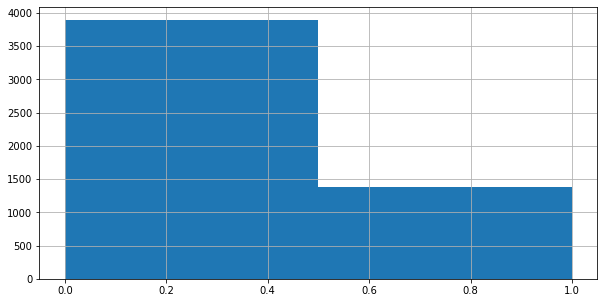

In [ ]:
target_hist = data[target_col].hist(figsize = (10, 5), bins=2)

In [ ]:
# Посчитаем долю объектов первого класса для целевой переменной
data[target_col].sum() / data[target_col].size, data[target_col].sum()

(0.2608200455580866, 1374)

Т.е. четверть выборки относится к 1 классу. И это почти 1400 примеров. Несбалансированность некритична.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
# YOUR CODE

Выберем простой вариант. __Применим StandardScaler к числовым признакам. OneHotEncoder к категориальным. Возьмем LogisticRegressionCV.__


__P.S.__ В процессе обсуждения в чате у меня возникла мысль, что я неверно поняла задание. Возможно требовалось разделить данные на train и  test, потом обработать данные (масштабировать, закодировать), потом подать только train в LogisticRegressionCV, а на test сделать предсказания. Потом взять тестовую выборку, на ней сделать предсказания и отправить в Kaggle.\
Мне такие манипуляции не пришли в голову, и я не делила исходные данные (хотя бы потому, что обработка данных стоит первым пунктом, а про refit указано "дообучилась на всем датасете", что невозможно при делении исходных данных). LogisticRegressionCV выполняет кросс-валидацию, подбирая параметр C. А значит осуществляет контроль за переобучением (для этого данные и делят). И судя по тому, что на "чистых" тестовых данных roc-auc выше 0.84, переобучения не произошло.

Вспомним, что TotalSpent имеет полную корреляцию с произведением MonthlySpending и ClientPeriod. При этом, корреляция с целевой переменной у него ниже, чем у этих признаков. Попробуем обучить модель логистической регрессии без этого признака. Также, откажемся от признака Sex, т.к. он не влияет на значение целевой переменной.

In [ ]:
data_num_cols = data[['ClientPeriod', 'MonthlySpending']]
data_cat_cols = data[new_cat_cols]

In [ ]:
# Масштабируем числовые признаки и закодируем категориальные
st_scaller = StandardScaler()
sc_data_num_cols = st_scaller.fit_transform(data_num_cols)

enc = OneHotEncoder(sparse = False)
enc_data_cat_cols = enc.fit_transform(data_cat_cols)
'Категориальные признаки', enc_data_cat_cols.shape, 'Числовые признаки', sc_data_num_cols.shape

('Категориальные признаки', (5268, 41), 'Числовые признаки', (5268, 2))

In [ ]:
# Трансформируем тестовую выборку
data_num_cols_t = test_data[['ClientPeriod', 'MonthlySpending']]
data_cat_cols_t = test_data[new_cat_cols]

sc_testdata_num_cols = st_scaller.transform(data_num_cols_t)
enc_testdata_cat_cols = enc.transform(data_cat_cols_t)

'Категориальные признаки', enc_testdata_cat_cols.shape, 'Числовые признаки', sc_testdata_num_cols.shape

('Категориальные признаки', (1761, 41), 'Числовые признаки', (1761, 2))

In [ ]:
# Соберем данные в таблицы
data_trans = np.concatenate([sc_data_num_cols, enc_data_cat_cols], axis = 1)
testdata_trans = np.concatenate([sc_testdata_num_cols, enc_testdata_cat_cols], axis = 1)

In [ ]:
'Размер обучающей выборки', data_trans.shape, 'Размер тестовой выборки', testdata_trans.shape

('Размер обучающей выборки', (5268, 43), 'Размер тестовой выборки', (1761, 43))

#### Обучим модель логистической регрессии

In [ ]:
C = [100, 10, 1, 0.1, 0.01, 0.001]
metric = 'roc_auc'
solver = 'saga'
class_weight = 'balanced'
ratios = [0.5, 0.5]

clf_logreg = LogisticRegressionCV(cv=5, random_state=1, 
                                  Cs = C, solver = solver, 
                                  penalty = 'elasticnet',
                                  scoring = metric,
                                  l1_ratios = ratios,
                                  refit = True).fit(data_trans, data[target_col])

In [ ]:
# Посмотрим на значение метрики
clf_logreg.score(data_trans, data[target_col])

0.8460946337028789

In [ ]:
# Посмотрим на лучший параметр C
clf_logreg.C_

array([0.1])

In [ ]:
# Сделаем предсказание
y_pred = clf_logreg.predict_proba(testdata_trans)
y_pred[:, 1]

array([0.0546041 , 0.70037532, 0.69769555, ..., 0.78231864, 0.64216465,
       0.01876543])

In [ ]:
# Запишем предсказание и попробуем сдать
# Пожалуйста, используйте свой путь для загрузки и записи данных. 
# Если выполняете на локальном компьютере, закомментируйте строки с загрузкой с Диска и раскомментируйте строки с путями на локальном компьютере
# submission = pd.read_csv('./submission.csv', index_col = 0) # Путь для загрузки данных на локальном компьютере из той же папки

submission = pd.read_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/submission.csv', index_col = 0)

submission['Churn'] = y_pred[:, 1]

# submission.to_csv('./my_submission.csv') # Запись в файл на свой локальный компьютер в ту же папку.
submission.to_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/my_submission.csv')

На обучающей выборке с применением LogisticRegressionCV удалось получить $ROC-AUC = 0.84609$. Лучшим параметром классификатор выбрал $C = 0.1$. При этом, я использовала регуляризатор $elasticnet$ с равной долей $l_1$ и $l_2$. На тестовой выборке на Kaggle $ROC-AUC = 0.84387$

### Обучим немного другую модель логистической регресии

In [ ]:
C = [100, 10, 1, 0.1, 0.01, 0.001]
metric = 'roc_auc'
solver = 'liblinear'


clf_logreg_b = LogisticRegressionCV(cv=5, random_state=1, 
                                  Cs = C, solver = solver, 
                                  penalty = 'l1',
                                  scoring = metric,
                                  class_weight = 'balanced',
                                  refit = True).fit(data_trans, data[target_col])

In [ ]:
# Посмотрим на значение метрики
clf_logreg_b.score(data_trans, data[target_col])

0.8458591353547316

In [ ]:
# Посмотрим на лучший параметр C
clf_logreg_b.C_

array([0.1])

In [ ]:
# Сделаем предсказание
y_pred = clf_logreg_b.predict_proba(testdata_trans)
y_pred[:, 1]

array([0.1535702 , 0.86538385, 0.85973688, ..., 0.90802612, 0.82841353,
       0.05065836])

In [ ]:
# Запишем предсказание и попробуем сдать
# Пожалуйста, используйте свой путь для загрузки и записи данных. 
# Если выполняете на локальном компьютере, закомментируйте строки с загрузкой с Диска и раскомментируйте строки с путями на локальном компьютере
# submission = pd.read_csv('./submission.csv', index_col = 0) # Путь для загрузки данных на локальном компьютере из той же папки

submission = pd.read_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/submission.csv', index_col = 0)

submission['Churn'] = y_pred[:, 1]

# submission.to_csv('./my_submission_2.csv') # Запись в файл на свой локальный компьютер в ту же папку.
submission.to_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/my_submission_2.csv')

На обучающей выборке с применением LogisticRegressionCV удалось получить $ROC-AUC = 0.84586$ (немного ниже, чем в первом случае). Лучшим параметром классификатор выбрал $C = 0.1$. При этом, я использовала регуляризатор $l1$. На тестовой выборке на Kaggle $ROC-AUC = 0.84436$, что немного лучше предыдущего результата. Напомню, что я не использовала при обучении модели 2 признака - $TotalSpent$ и $Sex$.

### Сделаем, как это требовалось в задании (т.е. так, как нужно делать, в случае отсутствия тестовых данных).

Сначала разделим данные, потом выполним их раздельную предобработку, а потом обучим модель.

In [ ]:
new_num_cols = ['ClientPeriod', 'MonthlySpending']
# Разделим данные
X_train, X_test, y_train, y_test = train_test_split(data[new_num_cols + new_cat_cols], 
                                                    data[target_col], 
                                                    test_size=0.1, random_state=1)


In [ ]:
# Сделаем pipeline

# Делаем трансформеры для данных
num_trans = StandardScaler() # Трансформер для числовых признаков
cat_trans = OneHotEncoder(sparse = False) # Трансформер для числовых признаков

# Создаем классификатор
C = [100, 10, 1, 0.1, 0.01, 0.001]
clf_logreg_pipe = LogisticRegressionCV(cv=5, random_state=1, 
                                  Cs = C, scoring = 'roc_auc',
                                  class_weight = 'balanced',
                                  refit = True)

# Делаем препроцессор (чтобы разделить данные на числовые и категориальные и раздельно их обработать)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_trans, new_num_cols),
        ('cat', cat_trans, new_cat_cols)])

# Сoбираем pipeline
clf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_logreg_pipe)])

In [ ]:
# Обучим модель и сделаем предсказания
clf_pipe.fit(X_train, y_train)
clf_pipe.score(X_test, y_test)

0.8508811147125666

In [ ]:
clf_pipe[1].get_params(deep=False)

{'Cs': [100, 10, 1, 0.1, 0.01, 0.001],
 'class_weight': 'balanced',
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'refit': True,
 'scoring': 'roc_auc',
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
# Лучшим коэффициентом C выбран:
clf_pipe[1].C_

array([0.01])

In [ ]:
# Сделаем предсказание по тестовым данным
y_pred = clf_pipe.predict_proba(test_data[new_num_cols + new_cat_cols])

In [ ]:
# Запишем предсказание и попробуем сдать
# Пожалуйста, используйте свой путь для загрузки и записи данных. 
# Если выполняете на локальном компьютере, закомментируйте строки с загрузкой с Диска и раскомментируйте строки с путями на локальном компьютере
# submission = pd.read_csv('./submission.csv', index_col = 0) # Путь для загрузки данных на локальном компьютере из той же папки

submission = pd.read_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/submission.csv', index_col = 0)

submission['Churn'] = y_pred[:, 1]

# submission.to_csv('./my_submission_1_1.csv') # Запись в файл на свой локальный компьютер в ту же папку.
submission.to_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/my_submission_1_1.csv')

На обучающей выборке с применением LogisticRegressionCV удалось получить $ROC-AUC = 0.85088$. Лучшим параметром классификатор выбрал $C = 0.1$. При этом, я использовала регуляризатор и solver по умолчанию. На тестовой выборке на Kaggle $ROC-AUC = 0.84326$.\
Качество получилось хуже, чем при обучении модели логистической регрессии на всех данных.

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество удалось получить на модели LogisticRegressionCV, обученной на полной обучающей выборке с параметрами:
 - solver = 'liblinear'
 - penalty = 'l1'
 - class_weight = 'balanced'
 - scoring = 'roc_auc'
 - Cs = 0.1
 - random_state = 1

 Остальные параметры по умолчанию.\
 На обучающей выборке $ROC-AUC = 0.84586$.\
 На тестовой выборке на Kaggle $ROC-AUC = 0.84436$\
 Напомню, что я не использовала при обучении модели 2 признака - $TotalSpent$ и $Sex$.

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

__Комментарий__: Нужно установить catboost. Я делала это через командную панель и conda.

Для начала форматируем исходные выборки (выбросим колонки с признаками $TotalSpent$ и $Sex$)

In [ ]:
cat_data = data.drop(columns = ['TotalSpent', 'Sex', 'Churn'])
cat_testdata = test_data.drop(columns = ['TotalSpent', 'Sex'])
'Обучающая выборка', cat_data.shape, 'Тестовая выборка', cat_testdata.shape

('Обучающая выборка', (5268, 17), 'Тестовая выборка', (1761, 17))

In [ ]:
from sklearn.model_selection import train_test_split
# !pip install catboost # Если у вас не установлен catboost (в т.ч. в Colab, то раскомментируйте эту строку)
import catboost
from sklearn.metrics import roc_auc_score

     |████████████████████████████████| 65.7MB 59kB/s 


__Попробуем без GridSearchCV__

In [ ]:
# Разделим выборку
X_train, X_test, y_train, y_test = train_test_split(cat_data, data[target_col], 
                                                       train_size=0.8, 
                                                       random_state=1)

In [ ]:
# Обучим модель, как это было сделано в семинаре
boosting_model = catboost.CatBoostClassifier(n_estimators=200, 
                                             cat_features=new_cat_cols,
                                             eval_metric='AUC',
                                             silent = True,
                                             random_seed = 0,
                                             )

boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

In [ ]:
# Все параметры модели
boosting_model.get_all_params()

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'class_names': [0, 1],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 1,
 'depth': 6,
 'eval_metric': 'AUC',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 200,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 10,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.08329799771308899,
 'loss_function': 'Logloss',
 'max_ctr_complexity': 4,


In [ ]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
'ROC-AUC на обучающей выборке', train_auc, 'ROC-AUC на тестовой выборке', test_auc

('ROC-AUC на обучающей выборке',
 0.8700473886494005,
 'ROC-AUC на тестовой выборке',
 0.8680758443379689)

Полученное качество ощутимо выше, чем при использовании логистической регрессии. Попробуем сделать предсказания и загрузить на Kaggle.

In [ ]:
# Запишем предсказание и попробуем сдать
# Пожалуйста, используйте свой путь для загрузки и записи данных. 
# Если выполняете на локальном компьютере, закомментируйте строки с загрузкой с Диска и раскомментируйте строки с путями на локальном компьютере

# submission = pd.read_csv('./submission.csv', index_col = 0) # Путь для загрузки данных на локальном компьютере из той же папки
submission = pd.read_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/submission.csv', index_col = 0)


y_pred = boosting_model.predict_proba(cat_testdata)[:, 1]
submission['Churn'] = y_pred 

# submission.to_csv('./my_submission_3.csv') # Запись в файл на свой локальный компьютер в ту же папку.
submission.to_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/my_submission_3.csv')

На тестовой выборке (из обучающих данных) с применением catboost удалось получить $ROC-AUC = 0.86808$ (это больше, чем в случае применения LogisticRegressionCV). Я использовала параментры по умолчанию (только установила 200 деревьев и eval_metric = 'AUC'). На тестовой выборке на Kaggle $ROC-AUC = 0.84749$, что лучше предыдущего результата. Напомню, что я не использовала при обучении модели 2 признака - $TotalSpent$ и $Sex$.

Для чистоты эксперимента попробуем все таки catboost  с параметрами по умолчанию

In [ ]:
# Разделим выборку
X_train, X_test, y_train, y_test = train_test_split(cat_data, data[target_col], 
                                                       train_size=0.9, 
                                                       random_state=1)

# Соберем и обучим модель
boosting_model_0 = catboost.CatBoostClassifier(cat_features=new_cat_cols,
                                               silent = True,
                                               random_seed = 1)

boosting_model_0.fit(X_train, y_train)

# Сделаем предсказания
y_train_predicted = boosting_model_0.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model_0.predict_proba(X_test)[:, 1]

In [ ]:
# Все параметры модели
boosting_model_0.get_all_params()

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'class_names': [0, 1],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 1,
 'depth': 6,
 'eval_metric': 'Logloss',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 10,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.020022999495267868,
 'loss_function': 'Logloss',
 'max_ctr_complexity

In [ ]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
'ROC-AUC на обучающей выборке', train_auc, 'ROC-AUC на тестовой выборке', test_auc

('ROC-AUC на обучающей выборке',
 0.8829919347764866,
 'ROC-AUC на тестовой выборке',
 0.8619090197831674)

In [ ]:
# Запишем предсказание и попробуем сдать
# Пожалуйста, используйте свой путь для загрузки и записи данных. 
# Если выполняете на локальном компьютере, закомментируйте строки с загрузкой с Диска и раскомментируйте строки с путями на локальном компьютере

# submission = pd.read_csv('./submission.csv', index_col = 0) # Путь для загрузки данных на локальном компьютере из той же папки
submission = pd.read_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/submission.csv', index_col = 0)


y_pred = boosting_model_0.predict_proba(cat_testdata)[:, 1]
submission['Churn'] = y_pred 

# submission.to_csv('./my_submission_3_2.csv') # Запись в файл на свой локальный компьютер в ту же папку.
submission.to_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/my_submission_0.csv')

На тестовой выборке (из обучающих данных) с применением catboost удалось получить $ROC-AUC = 0.86191$.\
На тестовой выборке на Kaggle $ROC-AUC = 0.85029$, что лучше предыдущего результата. Напомню, что я не использовала при обучении модели 2 признака - $TotalSpent$ и $Sex$.

In [ ]:
# Попробуем изменить параметры, чтобы улучшить качество
# Разделим выборку
X_train, X_test, y_train, y_test = train_test_split(cat_data, data[target_col], 
                                                       train_size=0.9, 
                                                       random_state=1)

# Сделаем и обучим модель
boosting_model_2 = catboost.CatBoostClassifier(n_estimators=500,
                                             cat_features=new_cat_cols,
                                             eval_metric='AUC',
                                             silent = True,
                                             random_seed = 1,
                                             learning_rate = 0.03,
                                             boosting_type='Ordered'
                                             )

boosting_model_2.fit(X_train, y_train)

# Сделаем предсказания
y_train_predicted = boosting_model_2.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model_2.predict_proba(X_test)[:, 1]

In [ ]:
# Все параметры модели
boosting_model_2.get_all_params()

{'approx_on_full_history': False,
 'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Ordered',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'class_names': [0, 1],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 1,
 'depth': 6,
 'eval_metric': 'AUC',
 'feature_border_type': 'GreedyLogSum',
 'fold_len_multiplier': 2,
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 500,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 10,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.02999999932

In [ ]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
'ROC-AUC на обучающей выборке', train_auc, 'ROC-AUC на тестовой выборке', test_auc

('ROC-AUC на обучающей выборке',
 0.860152740652512,
 'ROC-AUC на тестовой выборке',
 0.8608937819008233)

Качество предсказания даже хуже, чем в первой модели. Посмотрим, какое качество на тестовых данных на Kaggle.

In [ ]:
# Запишем предсказание и попробуем сдать
# Пожалуйста, используйте свой путь для загрузки и записи данных. 
# Если выполняете на локальном компьютере, закомментируйте строки с загрузкой с Диска и раскомментируйте строки с путями на локальном компьютере

# submission = pd.read_csv('./submission.csv', index_col = 0) # Путь для загрузки данных на локальном компьютере из той же папки
submission = pd.read_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/submission.csv', index_col = 0)


y_pred = boosting_model_2.predict_proba(cat_testdata)[:, 1]
submission['Churn'] = y_pred 

# submission.to_csv('./my_submission_3_2.csv') # Запись в файл на свой локальный компьютер в ту же папку.
submission.to_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/my_submission_3_2.csv')

На тестовой выборке (из обучающих данных) с применением catboost удалось получить $ROC-AUC = 0.86089$ (это больше, чем в случае применения LogisticRegressionCV). На тестовой выборке на Kaggle $ROC-AUC = 0.85431$, это пока лучший результат. Напомню, что я не использовала при обучении модели 2 признака - $TotalSpent$ и $Sex$.

__Попробуем подбор параметров по сетке__
*На моем компьютере поиск должен был занять 8 часов. Я остановила и загрузила ноутбук на Colab, продолжила там*\
__Операция заняла 5 часов!!!!__

In [ ]:
grid = {'learning_rate': [0.01, 0.03, 0.05, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': np.linspace(0, 9, 20),
        'penalties_coefficient': [100, 10, 1, 0.1, 0.01, 0.001]        
       }

boosting_model = catboost.CatBoostClassifier(n_estimators=300, silent=True,
                                             cat_features=new_cat_cols,
                                             eval_metric='AUC',
                                             boosting_type='Ordered',
                                             random_seed=1
                                            )

# Поскольку поиск по сетке происходит с помощью кросс-валидации (разбивка на train и test 80/20), подадим на вход всю выборку
boosting_model.grid_search(grid, cv = 5, X=cat_data, y=data[target_col], plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Выходные данные были обрезаны до нескольких последних строк (5000).
606:	loss: 0.8618579	best: 0.8643996 (34)	total: 46m 1s	remaining: 1h 3m 8s

bestTest = 0.8628334695
bestIteration = 23

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
607:	loss: 0.8628335	best: 0.8643996 (34)	total: 46m 10s	remaining: 1h 3m 10s

bestTest = 0.8619255456
bestIteration = 288

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
608:	loss: 0.8619255	best: 0.8643996 (34)	total: 46m 15s	remaining: 1h 3m 7s

bestTest = 0.8633516163
bestIteration = 296

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
609:	loss: 0.8633516	best: 0.8643996 (34)	total: 46m 21s	remaining: 1h 3m 4s

bestTest = 0.8637110515
bestIteration = 114

Metric AUC is not calculated on train b

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [ ]:
# Все параметры модели
boosting_model.get_all_params()

{'approx_on_full_history': False,
 'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Ordered',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'class_names': [0, 1],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 1,
 'depth': 10,
 'eval_metric': 'AUC',
 'feature_border_type': 'GreedyLogSum',
 'fold_len_multiplier': 2,
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 300,
 'l2_leaf_reg': 9.999999682655224e-21,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 10,
 'leaf_estimation_method': 'Newton',
 'learning

In [ ]:
# Запишем предсказание и попробуем сдать
# Пожалуйста, используйте свой путь для загрузки и записи данных. 
# Если выполняете на локальном компьютере, закомментируйте строки с загрузкой с Диска и раскомментируйте строки с путями на локальном компьютере

# submission = pd.read_csv('./submission.csv', index_col = 0) # Путь для загрузки данных на локальном компьютере из той же папки
submission = pd.read_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/submission.csv', index_col = 0)


y_pred = boosting_model.predict_proba(cat_testdata)[:, 1]
submission['Churn'] = y_pred 

# submission.to_csv('./my_submission_4.csv') # Запись в файл на свой локальный компьютер в ту же папку.
submission.to_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/my_submission_4.csv')

Результат на Kaggle $ROC-AUC = 0.85097$.\
Напомню, что результат модели градиентного бустинга с параметрами по умолчанию $ROC-AUC = 0.85029$. Т.е. разница всего $0.00068$ (и 5 часов на GridSearch).

__Проанализируем__
В чем модели с параметрами по умолчанию и модели с GridSearch:
 - n_estimators. Во втором случае 300. В первом 1000.
 - boosting_type. Во втором случае 'Ordered'. В первом 'Plain'.
 - depth. Во втором случае 10. В первом 6.
 - l2_leaf_reg. Во втором случае 0. В первом 3.
 - learning_rate. Во втором случае 0.05. В первом 0.02.
 - penalties_coefficient. Во втором случае 100. В первом 1.
 - Во втором случае обучение произошло на всей выборке, с помощью кросс-валидации и refit.
 
 Судя по тому, насколько получилась незначительная прибавка к качеству предсказания, не стоило 5 часов стараться.\

__Время обучения составило 45 минут__

In [ ]:
grid = {'depth': [10, 16],
        'penalties_coefficient': [100, 1000]        
       }

boosting_model_grid = catboost.CatBoostClassifier(n_estimators=300, silent=True,
                                             cat_features=new_cat_cols,
                                             eval_metric='AUC',
                                             boosting_type='Ordered',
                                             learning_rate = 0.05,
                                             l2_leaf_reg=0.3,
                                             random_seed=0
                                            )

# Поскольку поиск по сетке происходит с помощью кросс-валидации (разбивка на train и test 80/20), подадим на вход всю выборку
boosting_model_grid.grid_search(grid, cv = 3, X=cat_data, y=data[target_col], plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.862618742
bestIteration = 211

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8626187	best: 0.8626187 (0)	total: 25.4s	remaining: 1m 16s

bestTest = 0.862618742
bestIteration = 211

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8626187	best: 0.8626187 (0)	total: 50.7s	remaining: 50.7s

bestTest = 0.8618368538
bestIteration = 78

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8618369	best: 0.8626187 (0)	total: 23m 2s	remaining: 7m 40s

bestTest = 0.8618368538
bestIteration = 78

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8618369	best: 0.8626187 (0)	total: 45m 12s	remaining: 0us
Estim

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [ ]:
#GridSearch выбрал следующие параметры:
{'params': {'depth': 10, 'penalties_coefficient': 100}}

{'params': {'depth': 10, 'penalties_coefficient': 100}}

In [ ]:
# Все параметры модели:
boosting_model_grid.get_all_params()

{'approx_on_full_history': False,
 'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Ordered',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'class_names': [0, 1],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 1,
 'depth': 10,
 'eval_metric': 'AUC',
 'feature_border_type': 'GreedyLogSum',
 'fold_len_multiplier': 2,
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 300,
 'l2_leaf_reg': 0.30000001192092896,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 10,
 'leaf_estimation_method': 'Newton',
 'learning_r

In [ ]:
y_train_predicted = boosting_model_grid.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model_grid.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
'ROC-AUC на обучающей выборке', train_auc, 'ROC-AUC на тестовой выборке', test_auc

('ROC-AUC на обучающей выборке',
 0.8626125422575786,
 'ROC-AUC на тестовой выборке',
 0.8940243854933583)

In [ ]:
# Запишем предсказание и попробуем сдать
# Пожалуйста, используйте свой путь для загрузки и записи данных. 
# Если выполняете на локальном компьютере, закомментируйте строки с загрузкой с Диска и раскомментируйте строки с путями на локальном компьютере

# submission = pd.read_csv('./submission.csv', index_col = 0) # Путь для загрузки данных на локальном компьютере из той же папки
submission = pd.read_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/submission.csv', index_col = 0)


y_pred = boosting_model_grid.predict_proba(cat_testdata)[:, 1]
submission['Churn'] = y_pred 

# submission.to_csv('./my_submission_5.csv') # Запись в файл на свой локальный компьютер в ту же папку.
submission.to_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/my_submission_5.csv')

Результат на Kaggle $ROC-AUC = 0.85154$.\
Напомню, что результат самой первой модели градиентного бустинга (с параметрами по умолчанию) $ROC-AUC = 0.84749$. Т.е. разница всего $0.00405$.

Посмотрим, можем ли мы сделать что-то с числовыми признаками, чтобы повысить корреляцию с данными

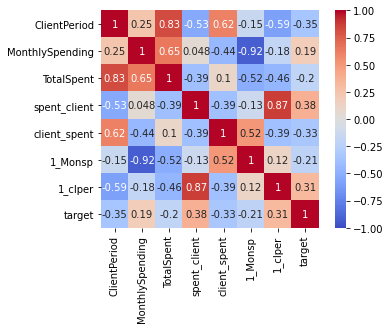

In [ ]:
data_new_feat = data[num_cols]

data_new_feat['spent_client'] = data_new_feat['MonthlySpending'] / data_new_feat['ClientPeriod']
data_new_feat['client_spent'] = data_new_feat['ClientPeriod'] / data_new_feat['MonthlySpending']
data_new_feat['1_Monsp'] = 1 / data_new_feat['MonthlySpending']
data_new_feat['1_clper'] = 1 / data_new_feat['ClientPeriod']
data_new_feat['target'] = data[target_col]
sns.heatmap(data_new_feat.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', square=True)

Интересно, что новый признак, равный делению MonthlySpending на ClientPeriod имеет более высокую корреляцию с целевой переменной, чем два эти признака.

Попробуем еще одну модель с новым признаком и с учетом некоторых наблюдений за результатами предыдущих исследований.

In [ ]:
cat_data['spent_client'] = cat_data['MonthlySpending'] / cat_data['ClientPeriod']
cat_data = cat_data.drop(columns = ['MonthlySpending'])

cat_testdata['spent_client'] = cat_testdata['MonthlySpending'] / cat_testdata['ClientPeriod']
cat_testdata = cat_testdata.drop(columns = ['MonthlySpending'])

'Обучающая выборка', cat_data.shape, 'Тестовая выборка', cat_testdata.shape

('Обучающая выборка', (5268, 17), 'Тестовая выборка', (1761, 17))

In [ ]:
# Не будем использовать Gridsearch, возьмем параметры лучшей модели (boosting_model_2)
# Разделим выборку
X_train, X_test, y_train, y_test = train_test_split(cat_data, data[target_col], 
                                                       train_size=0.9, 
                                                       random_state=1)

# Сделаем и обучим модель
boosting_model_3 = catboost.CatBoostClassifier(n_estimators=500,
                                             cat_features=new_cat_cols,
                                             eval_metric='AUC',
                                             silent = True,
                                             random_seed = 1,
                                             learning_rate = 0.03,
                                             boosting_type='Ordered',
                                             )

boosting_model_3.fit(X_train, y_train)

# Сделаем предсказания
y_train_predicted = boosting_model_3.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model_3.predict_proba(X_test)[:, 1]

In [ ]:
# Все параметры модели:
boosting_model_3.get_all_params()

{'approx_on_full_history': False,
 'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Ordered',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'class_names': [0, 1],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 1,
 'depth': 6,
 'eval_metric': 'AUC',
 'feature_border_type': 'GreedyLogSum',
 'fold_len_multiplier': 2,
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 500,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 10,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.02999999932

In [ ]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
'ROC-AUC на обучающей выборке', train_auc, 'ROC-AUC на тестовой выборке', test_auc

('ROC-AUC на обучающей выборке',
 0.8622527226477201,
 'ROC-AUC на тестовой выборке',
 0.8607074997205766)

In [ ]:
# Запишем предсказание и попробуем сдать
# Пожалуйста, используйте свой путь для загрузки и записи данных. 
# Если выполняете на локальном компьютере, закомментируйте строки с загрузкой с Диска и раскомментируйте строки с путями на локальном компьютере

# submission = pd.read_csv('./submission.csv', index_col = 0) # Путь для загрузки данных на локальном компьютере из той же папки
submission = pd.read_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/submission.csv', index_col = 0)


y_pred = boosting_model_3.predict_proba(cat_testdata)[:, 1]
submission['Churn'] = y_pred 

# submission.to_csv('./my_submission_5.csv') # Запись в файл на свой локальный компьютер в ту же папку.
submission.to_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/my_submission_6.csv')

Результат на Kaggle $ROC-AUC = 0.85303$.\
Это хуже, чем у лучшей модели ($ROC-AUC = 0.85431$). Можно сделать вывод, что манипуляции с числовыми признаками не привели к повышению качества предстаказаний.

In [ ]:
# Отменим операции изменения изначальных числовых признаков
cat_data = data.drop(columns = ['TotalSpent', 'Sex', 'Churn'])
cat_testdata = test_data.drop(columns = ['TotalSpent', 'Sex'])
'Обучающая выборка', cat_data.shape, 'Тестовая выборка', cat_testdata.shape

('Обучающая выборка', (5268, 17), 'Тестовая выборка', (1761, 17))

Попробуем еще поменять параметры модели.\
Я уже попробовала изменять глубину, penalties_coefficient, min_data_in_leaf, l2_leaf_reg. К повышению качества предсказаний это не привело.\
Я попробую еще несколько вариантов и оставлю только тот, который дает лучшее предсказание на тестовой выборке.

In [ ]:
# Попробуем еще поменять параметры модели
# Разделим выборку
X_train, X_test, y_train, y_test = train_test_split(cat_data, data[target_col], 
                                                       train_size=0.9, 
                                                       random_state=1)

# Сделаем и обучим модель
boosting_model_4 = catboost.CatBoostClassifier(n_estimators=500,
                                             cat_features=new_cat_cols,
                                             eval_metric='AUC',
                                             silent = True,
                                             random_seed = 1,
                                             learning_rate = 0.02,
                                             boosting_type='Ordered',
                                             
                                             )

boosting_model_4.fit(X_train, y_train)

# Сделаем предсказания
y_train_predicted = boosting_model_4.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model_4.predict_proba(X_test)[:, 1]

In [ ]:
# Все параметры модели:
boosting_model_4.get_all_params()

{'approx_on_full_history': False,
 'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Ordered',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'class_names': [0, 1],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 1,
 'depth': 6,
 'eval_metric': 'AUC',
 'feature_border_type': 'GreedyLogSum',
 'fold_len_multiplier': 2,
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 500,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 10,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.01999999955

In [ ]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
'ROC-AUC на обучающей выборке', train_auc, 'ROC-AUC на тестовой выборке', test_auc

('ROC-AUC на обучающей выборке',
 0.8554440258715013,
 'ROC-AUC на тестовой выборке',
 0.8589005625721843)

In [ ]:
# Запишем предсказание и попробуем сдать
# Пожалуйста, используйте свой путь для загрузки и записи данных. 
# Если выполняете на локальном компьютере, закомментируйте строки с загрузкой с Диска и раскомментируйте строки с путями на локальном компьютере

# submission = pd.read_csv('./submission.csv', index_col = 0) # Путь для загрузки данных на локальном компьютере из той же папки
submission = pd.read_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/submission.csv', index_col = 0)


y_pred = boosting_model_4.predict_proba(cat_testdata)[:, 1]
submission['Churn'] = y_pred 

# submission.to_csv('./my_submission_5.csv') # Запись в файл на свой локальный компьютер в ту же папку.
submission.to_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/my_submission_7.csv')

Результат на Kaggle $ROC-AUC = 0.85106$ (learning_rate = 0.02)\
Результат на Kaggle $ROC-AUC = 0.84926$. (learning_rate = 0.01)\
C learning_rate = 0.05 результат на Kaggle $ROC-AUC = 0.85030$\
С learning_rate = 0.03 и grow_policy='Depthwise' результат на Kaggle $ROC-AUC = 0.85044$\
Это все хуже, чем у лучшей модели ($ROC-AUC = 0.85431$).\ Можно сделать вывод, что количество деревьев = 500, learning_rate = 0.03, boosting_type='Ordered' дают лучший результат, чем манипуляции с другими параметрами (в какой-то из попыток я даже пробовала увеличивать количество деревьев).
Т.е. параметры по умолчанию в $catboost$ дают весьма неплохой результат (за 0% усилий).

Последняя попытка.

In [ ]:
# Разделим выборку также, как в предыдущих моделях
X_train, X_test, y_train, y_test = train_test_split(cat_data, data[target_col], 
                                                       train_size=0.9, 
                                                       random_state=1)
# Обучим модель
boosting_model_5 = catboost.CatBoostClassifier(n_estimators=500,
                                                  silent=True,
                                                  learning_rate = 0.03,
                                                  cat_features=new_cat_cols,
                                                  custom_loss=['AUC'],
                                                  eval_metric='AUC',
                                                  boosting_type='Ordered',
                                                  use_best_model=True,
                                                  random_seed=1
                                            )

boosting_model_5.fit(X_train, y_train, eval_set = (X_test, y_test), early_stopping_rounds=50, plot=False)

In [ ]:
boosting_model_5.get_all_params()

{'approx_on_full_history': False,
 'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Ordered',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'class_names': [0, 1],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 1,
 'custom_metric': ['AUC'],
 'depth': 6,
 'eval_metric': 'AUC',
 'feature_border_type': 'GreedyLogSum',
 'fold_len_multiplier': 2,
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 500,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 10,
 'leaf_estimation_method': 'Newton',
 'le

In [ ]:
# Сделаем предсказания
y_train_predicted = boosting_model_5.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model_5.predict_proba(X_test)[:, 1]
y_full_predicted = boosting_model_5.predict_proba(cat_data)[:, 1]

# Посчитаем метрики
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
full_auc = roc_auc_score(data[target_col], y_full_predicted)
'ROC-AUC на обучающей выборке', train_auc, 'ROC-AUC на тестовой выборке', test_auc, 'ROC-AUC на полной выборке', full_auc

('ROC-AUC на обучающей выборке',
 0.8598593548744513,
 'ROC-AUC на тестовой выборке',
 0.8611918333892179,
 'ROC-AUC на полной выборке',
 0.8598532508864832)

Стоит попробовать отправить в Kaggle. Это будет последняя попытка.

In [ ]:
# Запишем предсказание и попробуем сдать
# Пожалуйста, используйте свой путь для загрузки и записи данных. 
# Если выполняете на локальном компьютере, закомментируйте строки с загрузкой с Диска и раскомментируйте строки с путями на локальном компьютере

# submission = pd.read_csv('./submission.csv', index_col = 0) # Путь для загрузки данных на локальном компьютере из той же папки
submission = pd.read_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/submission.csv', index_col = 0)


y_pred = boosting_model_5.predict_proba(cat_testdata)[:, 1]
submission['Churn'] = y_pred 

# submission.to_csv('./my_submission_5.csv') # Запись в файл на свой локальный компьютер в ту же папку.
submission.to_csv('/content/drive/MyDrive/DLS_MFTI/DLS_adv/4W_Kaggle/my_submission_8.csv')

Результат на Kaggle $ROC-AUC = 0.85421$.\
Это хуже, чем у лучшей модели ($ROC-AUC = 0.85431$).\
Различные манипуляции с признаками и параметрами моделей не привели к ощутимым изменениям качества предсказаний. Даже предсказания модели логистической регресии оказались сопоставимы по качеству с градиентным бустингом.\
На мой взгляд, на данных небольшого размера (как в этом случае), с небольшим количеством категориальных признаков, лучше использовать логистическую регрессию. Она дает чуть хуже результат, но лучше интерпретируема.

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшая модель __boosting_model_2__ со следующими параметрами:
 - CatBoostClassifier,
 - n_estimators = 500,
 - eval_metric = 'AUC',
 - random_seed = 1,
 - learning_rate = 0.03,
 - boosting_type = 'Ordered'.

На тестовой выборке (из обучающих данных) $ROC-AUC = 0.86089$.

На тестовой выборке на Kaggle $ROC-AUC = 0.85431$.

Напомню, что я не использовала при обучении модели 2 признака - $TotalSpent$ и $Sex$.

# Предсказания

In [ ]:
best_model = boosting_model_2

На Kaggle и на Степике мои данные совпадают: Светлана_Астафьева.\
Текущая позиция в рейтинге Kaggle (15/03/2021 в 9.40) - 7 место (Чтобы было проще найти).\
В Telegram у меня такое же имя. И на всякий случай телефон 89268001099.

Следующий код выполнять не будем, т.к. предсказания уже выше записаны в файл __my_submission_3_2.csv__

In [ ]:
# X_test = pd.read_csv('./test.csv')
# submission = pd.read_csv('./submission.csv')

# submission['Churn'] = # best_model.predict_proba(X_test) / best_model.predict(X_test)
# submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.